## Classify Cats and Dogs using Fine Tuning of Resnet

Install needed library

In [1]:
! pip install matplotlib==3.7.1 matplotlib-inline==0.1.7 matplotlib-venn==0.11.10
! pip install numpy==1.26.4
! pip install fastai==2.7.16 fastbook==0.0.29

! pip install kora -q
! pip install Pillow

In [2]:
from fastbook import PILImage
from fastai.vision.all import *

import tkinter as tk
from tkinter import filedialog
from pathlib import Path
import os

In [3]:
! rm web_scraper.py
! wget https://gist.githubusercontent.com/arsalanyavari/e07e23acbc6b504156794cd62c749e2b/raw/782f31401130f460c59f2c1cb74b470df4b22619/web_scraper.py

--2024-08-16 09:07:54--  https://gist.githubusercontent.com/arsalanyavari/e07e23acbc6b504156794cd62c749e2b/raw/782f31401130f460c59f2c1cb74b470df4b22619/web_scraper.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2339 (2.3K) [text/plain]
Saving to: ‘web_scraper.py’

web_scraper.py      100%[===================>]   2.28K  --.-KB/s    in 0s      

2024-08-16 09:07:55 (41.7 MB/s) - ‘web_scraper.py’ saved [2339/2339]



In [4]:
from web_scraper import *
items = ["Penguin", "Octopus", "Whale", "Crab"]

for item in items:
    download_images(item, 200, 1.0, item)

Downloaded image_1.png
Downloaded image_2.png
Downloaded image_3.png
Downloaded image_4.png
Downloaded image_5.png
Downloaded image_6.png
Downloaded image_7.png
Downloaded image_8.png
Downloaded image_9.png
Downloaded image_10.png
Downloaded image_11.png
Downloaded image_12.png
Downloaded image_13.png
Downloaded image_14.png
Downloaded image_15.png
Downloaded image_16.png
Downloaded image_17.png
Downloaded image_18.png
Downloaded image_19.png
Downloaded image_20.png
Downloaded image_21.png
Downloaded image_22.png
Downloaded image_23.png
Downloaded image_24.png
Downloaded image_25.png
Downloaded image_26.png
Downloaded image_27.png
Downloaded image_28.png
Downloaded image_29.png
Downloaded image_30.png
Downloaded image_31.png
Downloaded image_32.png
Downloaded image_33.png
Downloaded image_34.png
Downloaded image_35.png
Downloaded image_36.png
Downloaded image_37.png
Downloaded image_38.png
Downloaded image_39.png
Downloaded image_40.png
Downloaded image_41.png
Downloaded image_42.png
D

In [5]:
! mkdir -p img && mv Crab/ Octopus/ Penguin/ Whale/ img

In [6]:
doc(ImageDataLoaders)

ImageDataLoaders(*loaders, path: 'str | Path' = '.', device=None)
Basic wrapper around several `DataLoader`s with factory methods for computer vision problems

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [7]:
path = Path("./img")
(path/'Penguin').ls()

(#200) [Path('img/Penguin/image_108.png'),Path('img/Penguin/image_44.png'),Path('img/Penguin/image_85.png'),Path('img/Penguin/image_78.png'),Path('img/Penguin/image_103.png'),Path('img/Penguin/image_76.png'),Path('img/Penguin/image_113.png'),Path('img/Penguin/image_70.png'),Path('img/Penguin/image_13.png'),Path('img/Penguin/image_90.png')...]

In [8]:
def label_func(obj):
    return obj.parent.name

dls = ImageDataLoaders.from_path_func(
    path=path,
    fnames=get_image_files(path),        
    valid_pct=0.2,
    seed=42,
    label_func=label_func,
    item_tfms=Resize(224)
)

/home/andre/miniconda3/envs/venv/lib/python3.12/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [9]:
model = vision_learner(dls, resnet34, metrics=error_rate)
model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.483755,0.007991,0.000000,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.023347,0.000311,0.000000,00:59


In [10]:
model.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

In [11]:
img_directory = 'test'
image_files = [os.path.join(img_directory, f) for f in os.listdir(img_directory) if f.endswith(('.jpg', '.jpeg', 'png'))]
image_files

['test/penguin.jpeg', 'test/octopus.jpeg', 'test/crab.jpg', 'test/whale.jpg']

In [12]:
for file in image_files:
    img = PILImage.create(file)
    pred, _, probs = model.predict(img)
    
    print(f'File: {file}, Prediction: {pred}')
    print(f'The Probability: {max(probs).item()}')

File: test/penguin.jpeg, Prediction: Penguin
The Probability: 0.9834340810775757


File: test/octopus.jpeg, Prediction: Octopus
The Probability: 0.9611632227897644


File: test/crab.jpg, Prediction: Crab
The Probability: 0.9999994039535522


File: test/whale.jpg, Prediction: Whale
The Probability: 0.9884501695632935


In [13]:
def open_file_dialog():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    print(f"Selected file: {file_path}")
    return file_path

user_file = open_file_dialog()

Selected file: /home/andre/code/AI/DL/fastai_multi_class_Classification/test1.png


Prediction: Whale
The Probability: 0.974514365196228


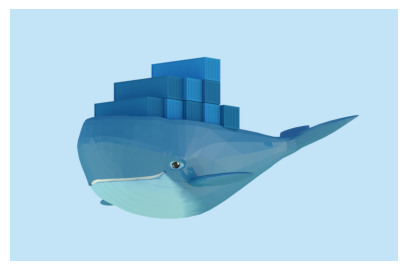

In [14]:
img = PILImage.create(user_file)
img.show()

pred, _, probs = model.predict(img)
    
print(f'Prediction: {pred}')
print(f'The Probability: {max(probs).item()}')

In [15]:
def open_file_dialog():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    print(f"Selected file: {file_path}")
    return file_path

user_file = open_file_dialog()

Selected file: /home/andre/code/AI/DL/fastai_multi_class_Classification/test2.webp


Prediction: Penguin
The Probability: 0.9336236119270325


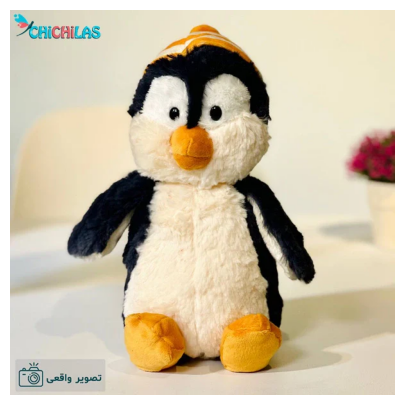

In [16]:
img = PILImage.create(user_file)
img.show()

pred, _, probs = model.predict(img)
    
print(f'Prediction: {pred}')
print(f'The Probability: {max(probs).item()}')